# CanESM5 GMD paper Figure 28

### history
-  SJH, first look 2019-06-10

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import glob
import matplotlib.patches as patches
from matplotlib.lines import Line2D

/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/ords/crd/ccrn/scrd104/miniconda3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
#constants 
%store -r color_dict

In [3]:
#open pre-processed data in pandas dataframes (easier than xarray for reading txt files)

#processed data are in .txt files (processed_data/fig-28_co2_fluxes_and_ff_emissions/canesm5_fcoo_cfnb_etc) with one file per ensemble member 
#each file contains LA_CO2_FLUX, OA_CO2_FLUX, DIAG_EMISS. Data from Vivek Arora.

data_path = 'input_data/processed_data/fig-28_co2_fluxes_and_ff_emissions/'
all_files = glob.glob(os.path.join(data_path, 'canesm5_fcoo_cfnb_etc/CanESM5_rc3.1-his*_for_Neils_paper.txt'))

all_data = pd.concat((pd.read_csv(f, index_col=0, delim_whitespace=True, header=0, names=['year','LA_CO2_FLUX','OA_CO2_FLUX','DIAG_EMISS']) for f in all_files), axis=1)

la_flux_cols = [col for col in all_data.columns if 'LA_CO2_FLUX' not in col]
la_flux_df = all_data.drop(la_flux_cols, axis=1)
la_flux_df.columns = np.arange(25,0,-1)

oa_flux_cols = [col for col in all_data.columns if 'OA_CO2_FLUX' not in col]
oa_flux_df = all_data.drop(oa_flux_cols, axis=1)
oa_flux_df.columns = np.arange(25,0,-1)

diag_emiss_cols = [col for col in all_data.columns if 'DIAG_EMISS' not in col]
diag_emiss_df = all_data.drop(diag_emiss_cols, axis=1)
diag_emiss_df.columns = np.arange(25,0,-1)

# also read in specified co2 for histroical runs
spec_co2_df = pd.read_csv(os.path.join(data_path, 'xl16.txt'), index_col=0, delim_whitespace=True, header=None, names = ['year','SPEC_CO2'])

# also read in CMIP6 specified FF anthropogenic emissions used in free CO2 runs
spec_emiss_df = pd.read_csv(os.path.join(data_path, 'cmip6_specified_eco2.txt'), index_col=0, delim_whitespace=True, header=None, names = ['year','SPEC_EMISS'])


In [4]:
#convert pandas dataframes to xarray data arrays

la_flux = la_flux_df.to_xarray().to_array()
oa_flux = oa_flux_df.to_xarray().to_array()
diag_emiss = diag_emiss_df.to_xarray().to_array()
spec_co2 = spec_co2_df.to_xarray().to_array().squeeze()
spec_emiss = spec_emiss_df.to_xarray().to_array().squeeze()


In [5]:
# correct oa_flux for drift in PI control run.
# the drift is -0.018 Pg C/yr, so we add this to all oa_flux numbers from all ensembles members
# I also need to add this to diag_emis, since in the ascii files in which I calculated
# diag_emissions, I didn't account for this drift (notes from Vivek)

diag_emiss=diag_emiss+0.018
oa_flux=oa_flux+0.018

In [6]:
#calculate mean and std dev for yearly CanESM5 data and for cumulative sums

la_flux_mean = la_flux.mean('variable')
la_flux_std  = la_flux.std('variable')
la_flux_cs = la_flux.cumsum('year')
la_flux_cs_mean = la_flux_cs.mean('variable')
la_flux_cs_std  = la_flux_cs.std('variable')

oa_flux_mean = oa_flux.mean('variable')
oa_flux_std  = oa_flux.std('variable')
oa_flux_cs = oa_flux.cumsum('year')
oa_flux_cs_mean = oa_flux_cs.mean('variable')
oa_flux_cs_std  = oa_flux_cs.std('variable')

diag_emiss_mean = diag_emiss.mean('variable')
diag_emiss_std  = diag_emiss.std('variable')
diag_emiss_cs = diag_emiss.cumsum('year')
diag_emiss_cs_mean = diag_emiss_cs.mean('variable')
diag_emiss_cs_std  = diag_emiss_cs.std('variable')

spec_emiss_cs = spec_emiss.cumsum('year')

In [7]:
#observations - all values come from Vivek's R script

#O-A flux
#the tuples here are the bottom left coords of the rectangles and height
# Le quere estimates for 60s, 70s, 80s, 90s, 00s
#s2=c("1.0±0.5","1.3±0.5","1.7±0.5","2.0±0.5","2.1±0.5") # from ESD 2018 paper

oa_lequere = [
    (1960,0.5,1), 
    (1970,0.8,1), 
    (1980,1.2,1), 
    (1990,1.5,1), 
    (2000,1.6,1), 
    ]

#O-A cumulative
oa_cuml_lequere = (2015,130,40) #the tuple here is the bottom left coords of the rectangles and height 
 
#L-A flux
#the tuples here are the bottom left coords of the rectangles and height
# Le quere estimates for 60s, 70s, 80s, 90s, 00s
#s2=c("0.2±0.5","0.4±0.6","0.1±0.6","1.0±0.6","1.6±0.6") # from ESD 2016 paper
#s2=c("0.4±0.5","0.7±0.6","0.4±0.6","1.3±0.6","1.7±0.6") # from ESD 2017 paper
#s2=c("0.3±0.5","0.6±0.6","0.4±0.6","1.2±0.6","1.6±0.6") # from ESD 2018 paper

la_lequere = [
    (1960,-0.2,1),
    (1970,0,1.2), 
    (1980,-0.2,1.2), 
    (1990,0.6,1.2), 
    (2000,1,1.2), 
    ]

#l-A cumulative
la_cuml_lequere = (2015,-100,180) #the tuple here is the bottom left coords of the rectangles and height 

#diag-emiss
#the tuples here are the bottom left coords of the rectangles and height
# Le quere estimates for 60s, 70s, 80s, 90s, 00s
#s2=c("3.1±0.2","4.7±0.2","5.4±0.3","6.3±0.3","7.8±0.4") # from ESD 2018 paper

de_lequere = [
    (1960,2.9,0.4),
    (1970,4.5,0.4), 
    (1980,5.1,0.6), 
    (1990,6.0,0.6), 
    (2000,7.4,0.8), 
    ]

#diag emiss cumulative
de_cuml_lequere = (2015,380,40) #the tuple here is the bottom left coords of the rectangles and height 



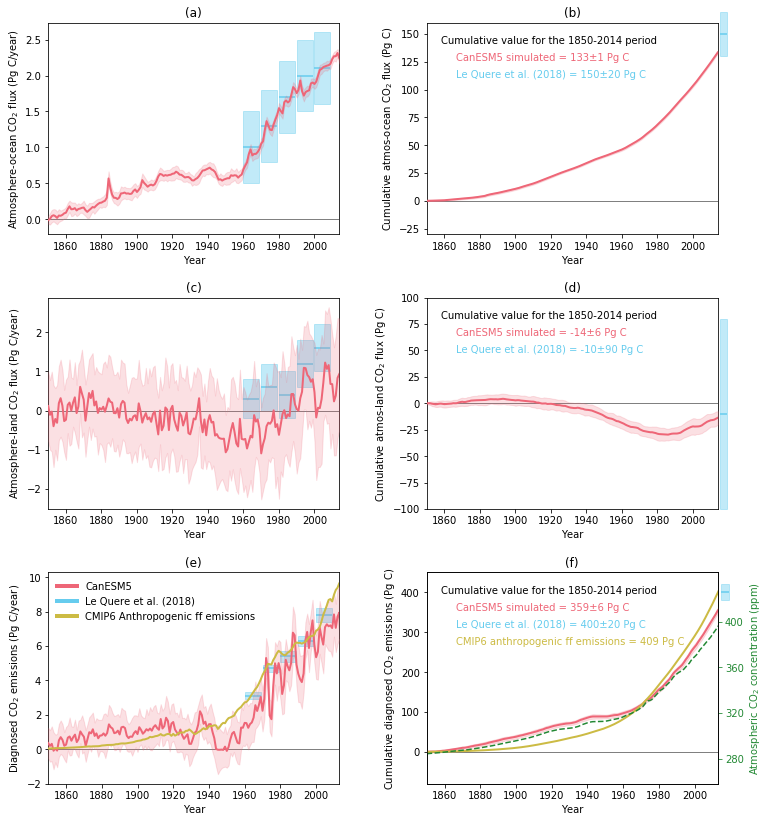

In [8]:
#plotting
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(12,14))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  
text_pos = [0.05, 0.9, 0.1, 0.82, 0.1, 0.74, 0.1, 0.66]
lequere_alpha = 0.4

ax1.plot(oa_flux_mean.year, oa_flux_mean, color=color_dict['CanESM5'],linewidth='2', zorder=30)
ax1.fill_between(oa_flux_mean.year, oa_flux_mean - oa_flux_std, oa_flux_mean + oa_flux_std, color=color_dict['CanESM5'], alpha=0.2, zorder=10)
ax1.set_ylabel(r'Atmosphere-ocean CO$_2$ flux (Pg C/year)') 
ax1.set_title('(a)')
#ax1.vlines(x=2009, ymin=2.8, ymax = 3.1, color=color_dict['Le Quere (2018)'])
for (year, value, height) in oa_lequere:
    rect = patches.Rectangle((year,value),9,height,linewidth=1,edgecolor=color_dict['Le Quere (2018)'],facecolor=color_dict['Le Quere (2018)'],alpha=lequere_alpha)
    ax1.add_patch(rect)
    ax1.hlines(y=(value+height/2),xmin=year,xmax=(year+9), color=color_dict['Le Quere (2018)'])
    #ax1.vlines(x=year, ymin=2.8, ymax = 3.1, color=color_dict['Le Quere (2018)'])
    #ax1.text(year+0.5, 2.95, str(year)+'s', horizontalalignment='left', verticalalignment='center', fontsize=5, color=color_dict['Le Quere (2018)'])


ax2.plot(oa_flux_cs_mean.year, oa_flux_cs_mean, color=color_dict['CanESM5'],linewidth='2', zorder=30)
ax2.fill_between(oa_flux_cs_mean.year, oa_flux_cs_mean - oa_flux_cs_std, oa_flux_cs_mean + oa_flux_cs_std, color=color_dict['CanESM5'], alpha=0.2, zorder=10)
ax2.set_ylim(-30, 160)
ax2.set_ylabel(r'Cumulative atmos-ocean CO$_2$ flux (Pg C)')   
ax2.set_title('(b)')
(year, value, height) = oa_cuml_lequere
rect = patches.Rectangle((year,value),4, height,linewidth=1,edgecolor=color_dict['Le Quere (2018)'],facecolor=color_dict['Le Quere (2018)'],alpha=lequere_alpha, clip_on=False)
ax2.add_patch(rect)
ax2.hlines(y=(value+height/2),xmin=year,xmax=(year+4), color=color_dict['Le Quere (2018)'], clip_on=False)
ax2.text(text_pos[0], text_pos[1], 'Cumulative value for the 1850-2014 period', color='k', transform = ax2.transAxes)
ax2.text(text_pos[2], text_pos[3], 'CanESM5 simulated = 133±1 Pg C', color=color_dict['CanESM5'], transform = ax2.transAxes)
ax2.text(text_pos[4], text_pos[5], 'Le Quere et al. (2018) = 150±20 Pg C', color=color_dict['Le Quere (2018)'], transform = ax2.transAxes)


ax3.plot(la_flux_mean.year, la_flux_mean, color=color_dict['CanESM5'],linewidth='2', zorder=30)
ax3.fill_between(la_flux_mean.year, la_flux_mean - la_flux_std, la_flux_mean + la_flux_std, color=color_dict['CanESM5'], alpha=0.2, zorder=10)
ax3.set_ylabel(r'Atmosphere-land CO$_2$ flux (Pg C/year)')    
ax3.set_title('(c)')
for (year, value,height) in la_lequere:
    rect = patches.Rectangle((year,value),9,height,linewidth=1,edgecolor=color_dict['Le Quere (2018)'],facecolor=color_dict['Le Quere (2018)'],alpha=lequere_alpha)
    ax3.add_patch(rect)
    ax3.hlines(y=(value+height/2),xmin=year,xmax=(year+9), color=color_dict['Le Quere (2018)'])


ax4.plot(la_flux_cs_mean.year, la_flux_cs_mean, color=color_dict['CanESM5'],linewidth='2', zorder=30)
ax4.fill_between(la_flux_cs_mean.year, la_flux_cs_mean - la_flux_cs_std, la_flux_cs_mean + la_flux_cs_std, color=color_dict['CanESM5'], alpha=0.2, zorder=10)
ax4.set_ylim(-100, 100)
ax4.set_ylabel(r'Cumulative atmos-land CO$_2$ flux (Pg C)')   
ax4.set_title('(d)')
(year, value, height) = la_cuml_lequere
rect = patches.Rectangle((year,value),4, height,linewidth=1,edgecolor=color_dict['Le Quere (2018)'],facecolor=color_dict['Le Quere (2018)'],alpha=lequere_alpha, clip_on=False)
ax4.add_patch(rect)
ax4.hlines(y=(value+height/2),xmin=year,xmax=(year+4), color=color_dict['Le Quere (2018)'], clip_on=False)
ax4.text(text_pos[0], text_pos[1], 'Cumulative value for the 1850-2014 period', color='k', transform = ax4.transAxes)
ax4.text(text_pos[2], text_pos[3], 'CanESM5 simulated = -14±6 Pg C', color=color_dict['CanESM5'], transform = ax4.transAxes)
ax4.text(text_pos[4], text_pos[5], 'Le Quere et al. (2018) = -10±90 Pg C', color=color_dict['Le Quere (2018)'], transform = ax4.transAxes)


ax5.plot(diag_emiss_mean.year, diag_emiss_mean, color=color_dict['CanESM5'],linewidth='2', zorder=30)
ax5.plot(spec_emiss.year,spec_emiss, color= color_dict['spec_emiss'],linewidth='2', zorder=30)
ax5.fill_between(diag_emiss_mean.year, diag_emiss_mean - diag_emiss_std, diag_emiss_mean + diag_emiss_std, color=color_dict['CanESM5'], alpha=0.2, zorder=10)
ax5.set_ylabel(r'Diagnosed CO$_2$ emissions (Pg C/year)')    
ax5.set_title('(e)')
for (year, value,height) in de_lequere:
    rect = patches.Rectangle((year,value),9,height,linewidth=1,edgecolor=color_dict['Le Quere (2018)'],facecolor=color_dict['Le Quere (2018)'],alpha=lequere_alpha)
    ax5.add_patch(rect)
    ax5.hlines(y=(value+height/2),xmin=year,xmax=(year+9), color=color_dict['Le Quere (2018)'])
legend_lines = [Line2D([0], [0], color=color_dict['CanESM5'], lw=4),
                Line2D([0], [0], color=color_dict['Le Quere (2018)'], lw=4),
                Line2D([0], [0], color=color_dict['spec_emiss'], lw=4)]
ax5.legend(legend_lines, ['CanESM5', 'Le Quere et al. (2018)', 'CMIP6 Anthropogenic ff emissions'],frameon=False)
    

ax6.plot(diag_emiss_cs_mean.year, diag_emiss_cs_mean, color=color_dict['CanESM5'],linewidth='2', zorder=30)
ax6.plot(spec_emiss_cs.year, spec_emiss_cs,  color= color_dict['spec_emiss'], linewidth='2', zorder=30)
ax6.fill_between(diag_emiss_cs_mean.year, diag_emiss_cs_mean - diag_emiss_cs_std, diag_emiss_cs_mean + diag_emiss_cs_std, color=color_dict['CanESM5'], alpha=0.2, zorder=10)
ax6.set_ylim(-80, 450)
ax6.set_ylabel(r'Cumulative diagnosed CO$_2$ emissions (Pg C)')   
ax6.set_title('(f)')
(year, value, height) = de_cuml_lequere
rect = patches.Rectangle((year,value),4, height,linewidth=1,edgecolor=color_dict['Le Quere (2018)'],facecolor=color_dict['Le Quere (2018)'],alpha=lequere_alpha, clip_on=False)
ax6.add_patch(rect)
ax6.hlines(y=(value+height/2),xmin=year,xmax=(year+4), color=color_dict['Le Quere (2018)'], clip_on=False)
ax6.text(text_pos[0], text_pos[1], 'Cumulative value for the 1850-2014 period', color='k', transform = ax6.transAxes)
ax6.text(text_pos[2], text_pos[3], 'CanESM5 simulated = 359±6 Pg C', color=color_dict['CanESM5'], transform = ax6.transAxes)
ax6.text(text_pos[4], text_pos[5], 'Le Quere et al. (2018) = 400±20 Pg C', color=color_dict['Le Quere (2018)'], transform = ax6.transAxes)
ax6.text(text_pos[6], text_pos[7], 'CMIP6 anthropogenic ff emissions = 409 Pg C', color=color_dict['spec_emiss'], transform = ax6.transAxes)


ax7 = ax6.twinx()
ax7.plot(spec_co2.year,spec_co2,color_dict['spec_co2'], linestyle='--')
ax7.set_ylim(258,443)
ax7.set_yticks([280,320,360,400])
ax7.set_ylabel(r'Atmospheric CO$_2$ concentration (ppm)', color=color_dict['spec_co2'])
ax7.tick_params(axis='y', colors=color_dict['spec_co2'])


for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.set_xlabel('Year')    
    ax.set_xlim(1850, 2014)
    ax.axhline(y=0, color='grey', linestyle='-',linewidth=1)
    if ax in [ax5,ax6]:
        ax.set_xlim(1850,2013)

plt.savefig('plots/fig-28_co2_flux_and_ff_emissions.png', bbox_inches='tight')
plt.savefig('plots/fig-28_co2_flux_and_ff_emissions.pdf', bbox_inches='tight')